# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [3]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Mount to Google Drive and define the path to the folder we are working out of

In [4]:
from google.colab import drive
drive.mount('/content/drive')
folderpath="/content/drive/MyDrive/data_skills_showcase/FoodHub/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Understanding the structure of the data

In [5]:
# read the data
df = pd.read_csv(folderpath + 'foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

###### The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [6]:
# Checking the shape of the data frame tells us how many rows and columns are in the dataset
df.shape

(1898, 9)

#### Observations:
###### There are 1898 Rows and 9 Columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset?

In [7]:
# df.info() displays information about the df including the data type of the columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
###### The following fields are all of type int: ['order_id', 'customer_id', 'food_preparation_time', 'delivery_time']
###### The lone field of type float is: ['cost_of_the_order']
###### The remaining fields are all type object: ['restaurant_name', 'cuisine_type','day_of_the_week', 'rating']
###### The Object fields stand out to me because I would think they should just be type string instead.

### **Question 3:** Are there any missing values in the data?

In [9]:
# isnull() can be used to determine if there are null values by column
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [10]:
# or if any are present in the dataframe as a whole
df.isnull().values.any()

np.False_

#### Observations:
###### We can infer from df.shape that the dataset has 1898 rows and df.info() that each column has 1898 values that are non nulls ergo the entire data frame is absent of null values.  But we can also verify this in a variety of ways with df.isnull()

### **Question 4:** What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [11]:
# Checking the min max and mean of the food_preperation_time column can answer these questions.
print(f'The Min food preparation time is ' +  str(df['food_preparation_time'].min()) + ' minutes')
print(f'The Mean food preparation time is ' +  str(df['food_preparation_time'].mean().round(2)) + ' minutes')
print(f'The Max food preparation time is ' +  str(df['food_preparation_time'].max()) + ' minutes')

The Min food preparation time is 20 minutes
The Mean food preparation time is 27.37 minutes
The Max food preparation time is 35 minutes


#### Observations:
###### Of the orders in our data set the fastest prep time is 20 minutes, the average is 27.37 minutes and the longest is 35 minutes.
###### The way this is measured though is potentially misleading because it is calculated based on the time that the delivery person picks up the food.  It's possible the food is ready and waiting in less time than it takes for the delivery person to arrive at the restaurant to pick up the order but we have no way of knowing from this data set.

### **Question 5:** How many orders are not rated?

In [12]:
# Check the rating column to see how orders are rated
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [13]:
# mask the base df based on ratings with 'Not given' value to see how many are not rated.
ratingdf = df[df['rating'] == 'Not given']
ratingdf

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28
14,1478198,62667,Lucky's Famous Burgers,American,12.13,Weekday,Not given,23,30
...,...,...,...,...,...,...,...,...,...
1887,1476873,237616,Shake Shack,American,5.82,Weekend,Not given,26,30
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24


In [14]:
# can also check the shape of the df
ratingdf.shape[0]

736

#### Observations:
######There are 736 orders that have a 'rating' value of 'Not given'

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions.

#### 6.1 'order_id'

In [15]:
# There isn't really much to graph for order_id, it's a unique identifier for each order and we can simply do a unique count to verify that there are 1898 orders in our data set and no duplicates as that is the size of our dataset.
df['order_id'].nunique()

1898

#### 6.2 'customer_id'

In [16]:
# Similarly to order_id, customer_id simply identifies individuals making a purchase and there isn't much to look at if you tried to graph just it.
# However, you could use it to gain insights into how many purchases our users tend to make.
order_counts = df['customer_id'].value_counts()

In [17]:
# In order to turn this into a graph that is not visually cluttered I'll use pd.cut to put our value counts into buckets showing how many customers make a specific number of purchases.
cust_bins = [0, 1, 3, float('inf')]  # Define your ranges [0,1], (1,3], (3, infinity])
cust_labels = ['1', '2-3', '4+'] # labels for our bins
cust_binned = pd.cut(order_counts, bins=cust_bins, labels=cust_labels, right=True) #right = True to include the right most edge of our bins
cust_binned.value_counts()

,count
count,
1,784
2-3,350
4+,66


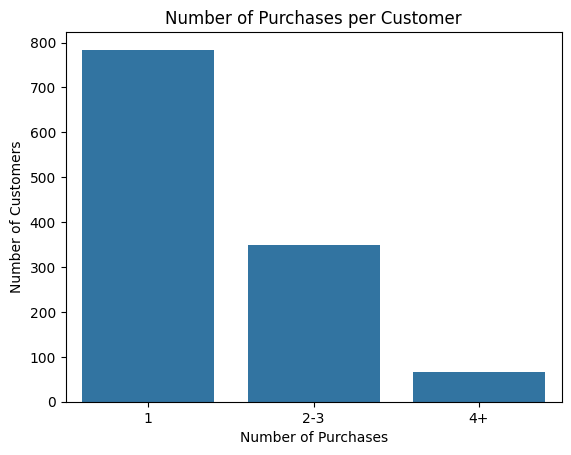

In [18]:
# Plot a graph showing number of purchases per customer
# This shows that the majority of customers using the app to order food only use it a single time with very few customers making 4 or more orders.  Maybe we can do something to convert more of our 1 time purchasers into repeat customers.
sns.countplot(x=cust_binned)
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Number of Purchases per Customer')
plt.show()

#### 6.3 'restaurant_name'

In [19]:
# This field shows that there are 178 different restaurants our customers have ordered from.
df['restaurant_name'].nunique()

178

In [20]:
# We can use a process similar to our customer_id graphs to show how many orders our restaurants are filling.
restaurant_orders = df['restaurant_name'].value_counts()
restaurant_orders

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
...,...
Rye House,1
Hiroko's Place,1
Frank Restaurant,1


In [21]:
# In order to turn this into a graph that is not visually cluttered I'll use pd.cut to put our value counts into buckets showing how many restaurants are filling a certain number of orders.
restr_bins = [0, 1, 3, 5, 10, 15, 20, 25, float('inf')]  # Define your ranges [0,1], (1,3], (3,5], (5,10], (10,15], (15,20], (20,25], (25,infinity])
restr_labels = ['1', '2-3', '4-5', '6-10', '11-15', '16-20', '21-25', '26+'] # labels for our bins
restr_binned = pd.cut(restaurant_orders, bins=restr_bins, labels=restr_labels, right=True) #right = True to include the right most edge of our bins
restr_binned.value_counts()

,count
count,
1,50
2-3,46
4-5,24
6-10,18
26+,18
11-15,12
16-20,7
21-25,3


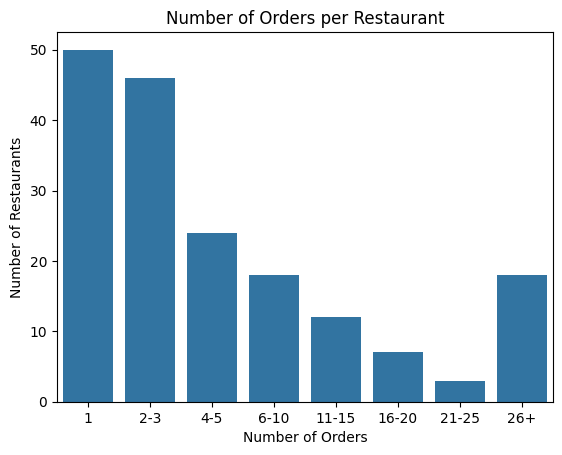

In [22]:
# I'm not sure if this graph is very good or not.  The bins aren't all the same size but the point I'm trying to show is that there are a lot of restaurants on the app that only have a small number of orders.
# Despite that theres also an obvious Top 20 that are performing better than the rest and maybe we should focus on promoting those restaurants in order to get more orders.
sns.countplot(x=restr_binned)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Restaurants')
plt.title('Number of Orders per Restaurant')
plt.show()

In [23]:
### This is what it would look like with the 1-5 combined which I think is worse visually.
# restr_bins = [0, 5, 10, 15, 20, 25, float('inf')]  # Define your ranges [0,5], (5,10], (10,15], (15,20], (20,25], (25,infinity])
# restr_labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26+'] # labels for our bins
# restr_binned = pd.cut(restaurant_orders, bins=restr_bins, labels=restr_labels, right=True) #right = True to include the right most edge of our bins
# sns.countplot(x=restr_binned)
# plt.xlabel('Number of Orders')
# plt.ylabel('Number of Restaurants')
# plt.title('Number of Orders per Restaurant')
# plt.show()

#### 6.4 'cuisine_type'

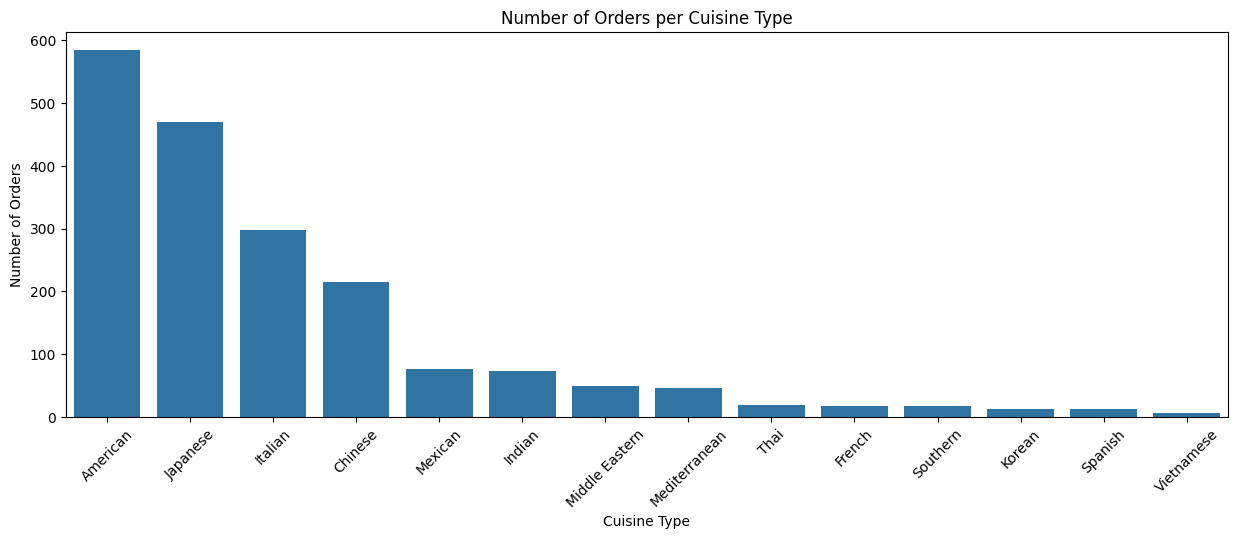

In [24]:
# This countplot gives a good overview of the types of cuisine that people are ordering with the app.
# The most popular types of cuisine with over 100 orders in descending order are 'American' -> 'Japanese' -> 'Italian' -> 'Chinese'
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type', order = df['cuisine_type'].value_counts().index) # Create a countplot for cuisine type in decending order
plt.xticks(rotation = 45) # rotate x-axis label for visibility
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Cuisine Type')
plt.show()

#### 6.5 'cost_of_the_order'

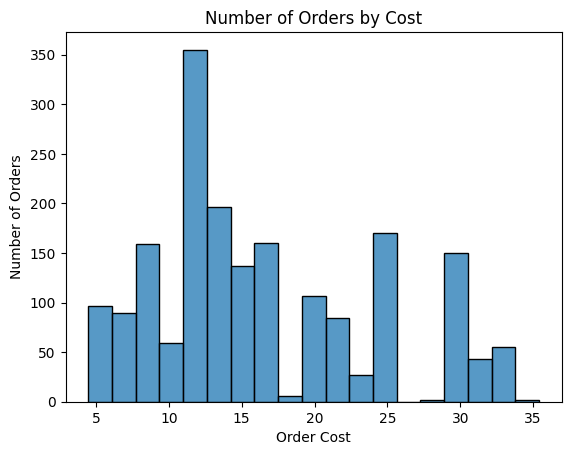

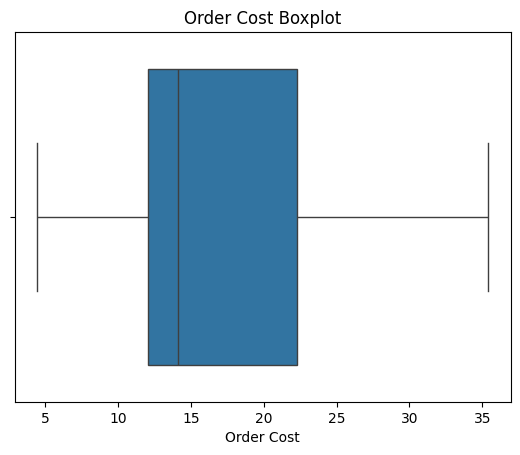

In [25]:
# The average cost of orders is ~$13-14 but the distribution is right skewed by more costly orders.
sns.histplot(data=df, x='cost_of_the_order') ## Histogram for the cost of order
plt.xlabel('Order Cost')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Cost')
plt.show()

sns.boxplot(data=df, x='cost_of_the_order') ## Boxplot for the cost of order
plt.xlabel('Order Cost')
plt.title('Order Cost Boxplot')
plt.show()

#### 6.6 'day_of_the_week'

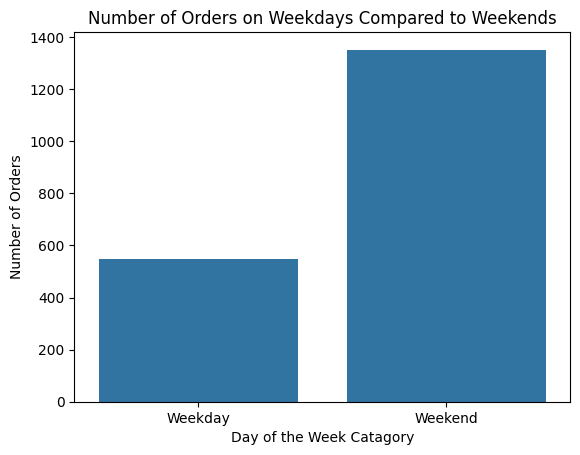

In [26]:
# This one is a straightforward count of orders on the Weekend and on Weekdays.
# You might think since the Weekday catagory contains more days there would be more orders but that's not the case.
# Our app gets significantly more orders per day on the Weekend.
# Personally I think this field could benefit from a higher level of specificity by being broken down into each day of the week.  (We could still combine it into weekday/weekend when doing analysis if desired.)
sns.countplot(data=df, x='day_of_the_week', order=['Weekday','Weekend'])
plt.xlabel('Day of the Week Catagory')
plt.ylabel('Number of Orders')
plt.title('Number of Orders on Weekdays Compared to Weekends')
plt.show()

#### 6.7 'rating'

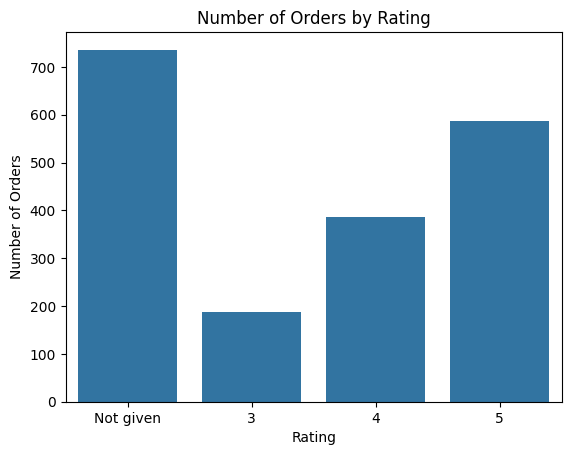

In [27]:
# This countplot shows the number of specific ratings people have given on their orders.
# Many customers choose not to provide a rating but of the ones that do they tend to rate highly
# Noteably the data dictionary defines this field as 'Rating given by the customer out of 5' which I would assume means 1-5 but the lowest ratings is a 3 which I find incredibly suspicious.
# I would question the validity of the data provided if given the opportunity or ask for clarification (Maybe you can only rate 3-5)
sns.countplot(data=df,x='rating', order=['Not given', '3', '4','5'])
plt.xlabel('Rating')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Rating')
plt.show()

#### 6.8 'food_preparation_time'

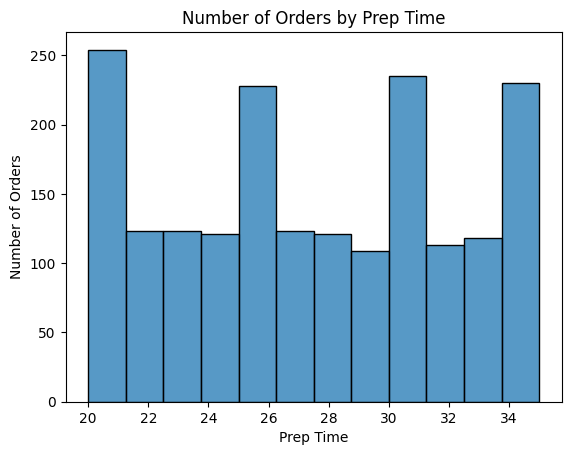

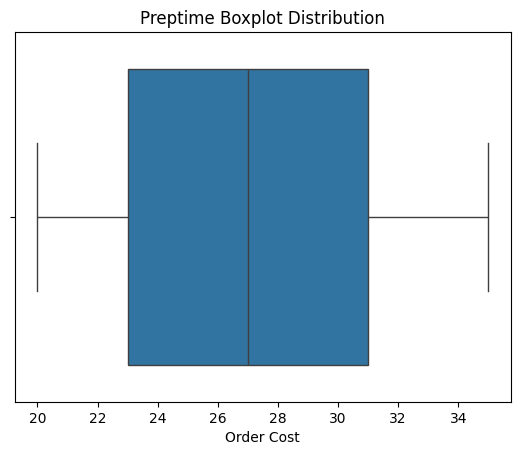

In [28]:
# Our food preparation_time is generally pretty even with some strange spikes in times around 5 minute intervals ranging from 20-35 minutes
# The average food_preperation time appears to be around 27 minutes.
sns.histplot(data=df,x='food_preparation_time') ## Histogram for food_preparation_time
plt.xlabel('Prep Time')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Prep Time')
plt.show()

sns.boxplot(data=df,x='food_preparation_time') ## Boxplot for food_preparation_time
plt.xlabel('Order Cost')
plt.title('Preptime Boxplot Distribution')
plt.show()

#### 6.9 'delivery_time'

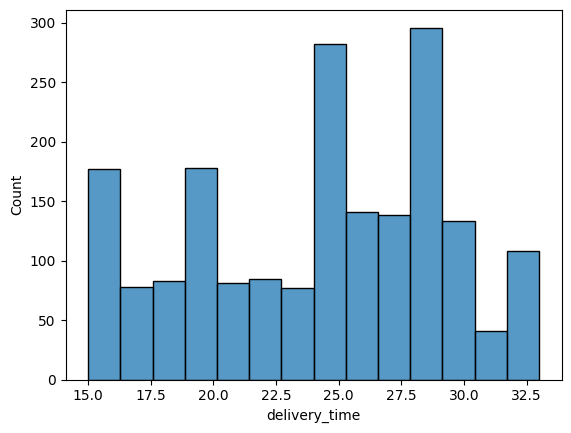

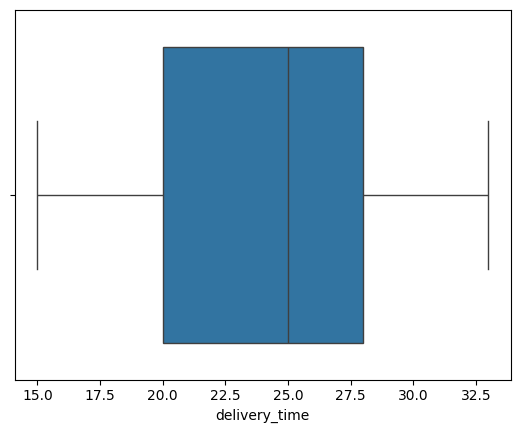

In [29]:
# Delivery time averages around 25 minutes but is left skewed with an IQR from ~20-28 Minutes
sns.histplot(data=df,x='delivery_time') ## Histogram for delivery_time
plt.show()
sns.boxplot(data=df,x='delivery_time') ## Boxplot for delivery_time
plt.show()

### **Question 7**: What are the top 5 restaurants in terms of the number of orders received?

In [30]:
# search the restaurant_name column for the 5 values that occur the most + some extra to ensure there isn't a tie.
df['restaurant_name'].value_counts()[:7]

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68
RedFarm Broadway,59
RedFarm Hudson,55


#### Observations:
###### The 5 restaurants with the most orders are the following:
###### Shake Shack: 219 orders
###### The Meatball Shop: 132 orders
###### Blue Ribbon Sushi: 119 orders
###### Blue Ribbon Fried Chicken:	96 orders
###### Parm: 68 orders


Since this is a fake data set it's not really feasible but I would be interested in finding out if Blue Ribbon Sushi and Blue Ribbon Fried Chicken are different parts / menus for the same restaurant.  If so that could change the results if the data needs to be scrubbed and the orders combined.  It would It would also suggest that there might be other restaurants that could be split up by menu.


### **Question 8**: Which is the most popular cuisine on weekends?

In [31]:
#Check the way the data is labeled
df['day_of_the_week'].unique()

array(['Weekend', 'Weekday'], dtype=object)

In [32]:
#Create masked dataframe containing only orders from the weekends
weekendcuisinedf = df[df['day_of_the_week'] == 'Weekend']
weekendcuisinedf

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
11,1478437,221206,Empanada Mama (closed),Mexican,8.10,Weekend,5,23,22
...,...,...,...,...,...,...,...,...,...
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [33]:
# get count of orders by cuisine type from the weekend filtered data frame
weekendcuisinedf['cuisine_type'].value_counts()

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Middle Eastern,32
Mediterranean,32
Thai,15


In [34]:
# Check weekdays because i'm curious if it's different
weekdaycuisinedf = df[df['day_of_the_week'] == 'Weekday']['cuisine_type'].value_counts()
weekdaycuisinedf

,count
cuisine_type,
American,169
Japanese,135
Italian,91
Chinese,52
Mexican,24
Indian,24
Middle Eastern,17
Mediterranean,14
Southern,6


In [35]:
#Checking that the whole dataset is encompassed by weekday and weekends
weekendcuisinedf['cuisine_type'].value_counts().sum() + weekdaycuisinedf.sum()

np.int64(1898)

#### Observations:
###### The most popular type of Cuisine on the Weekends is 'American' with 415 orders  

(It is also the most popular type of cuisine on weekdays)

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [36]:
# create conditions and outputs lists for adding a new series to the dataframe based on the 'cost_of_the_order' field
# If 'cost_of_the_order' > $20 then 'over'.  If <= 20 then 'under'
conditions = [df['cost_of_the_order'] > 20, df['cost_of_the_order'] <= 20]
outputs = ['over', 'under']

In [37]:
# add the field to the dataframe
df['$20'] = pd.DataFrame(np.select(conditions, outputs, 'default'))
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,over
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,under
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,under
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,under
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,over
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,under
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,over
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,under


In [38]:
#ensure that there are no 'default' values
df['$20'].unique()

array(['over', 'under'], dtype=object)

In [39]:
#Get the count of how many 'over' and 'unders' are in $20 column.  Divide by the total number of rows then multiple by 100 and round to 2 decimals
round(df['$20'].value_counts() / df.shape[0] * 100, 2)

,count
$20,
under,70.76
over,29.24


#### Observations:
###### 29.24% of all order cost more than $20


### **Question 10**: What is the mean order delivery time?

In [40]:
#just need to take the mean of the 'delivery_time' column
df['delivery_time'].mean().round(2)

np.float64(24.16)

#### Observations:
###### Mean 'delivery_time' is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [41]:
#Take a slice of the count of occurances of the customer_id field (with some extra to check for ties)
df['customer_id'].value_counts()[:5]

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


#### Observations:
###### The customer_ids with the most number of orders in our dataset are as follows
######52832:	13 orders
######47440:	10 orders
######83287:	9 orders

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset.


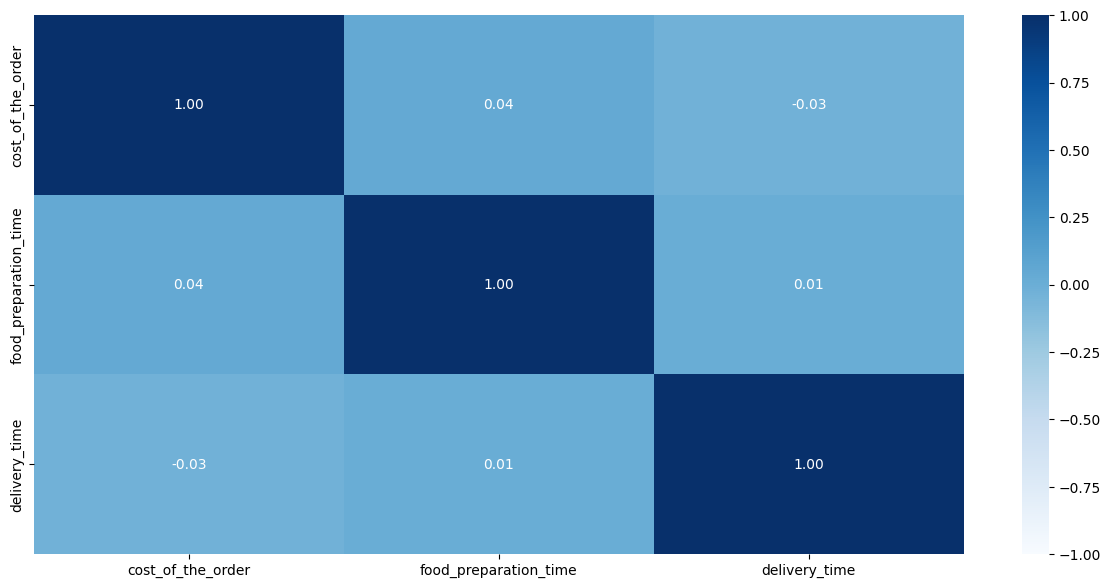

In [42]:
# These are the only fields we can actually find a correlation between because they're the only numeric fields that aren't just identifiers like order_id and customer_id
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues")
plt.show()

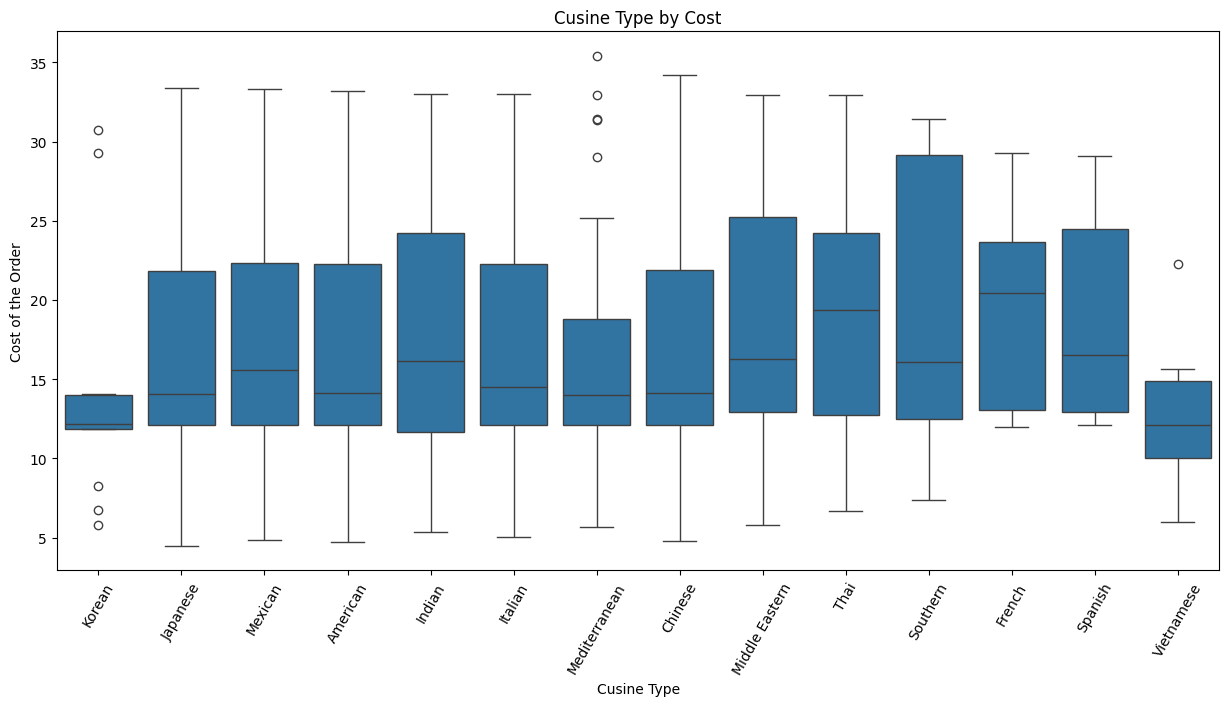

In [43]:
# This box plot shows that vietnamese and korean food orders tend to be the cheapest (Though the Korean orders have outliers on both sides)
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'cuisine_type', y = 'cost_of_the_order')
plt.xlabel('Cusine Type')
plt.xticks(rotation = 60)
plt.ylabel('Cost of the Order')
plt.title('Cusine Type by Cost')
plt.show()

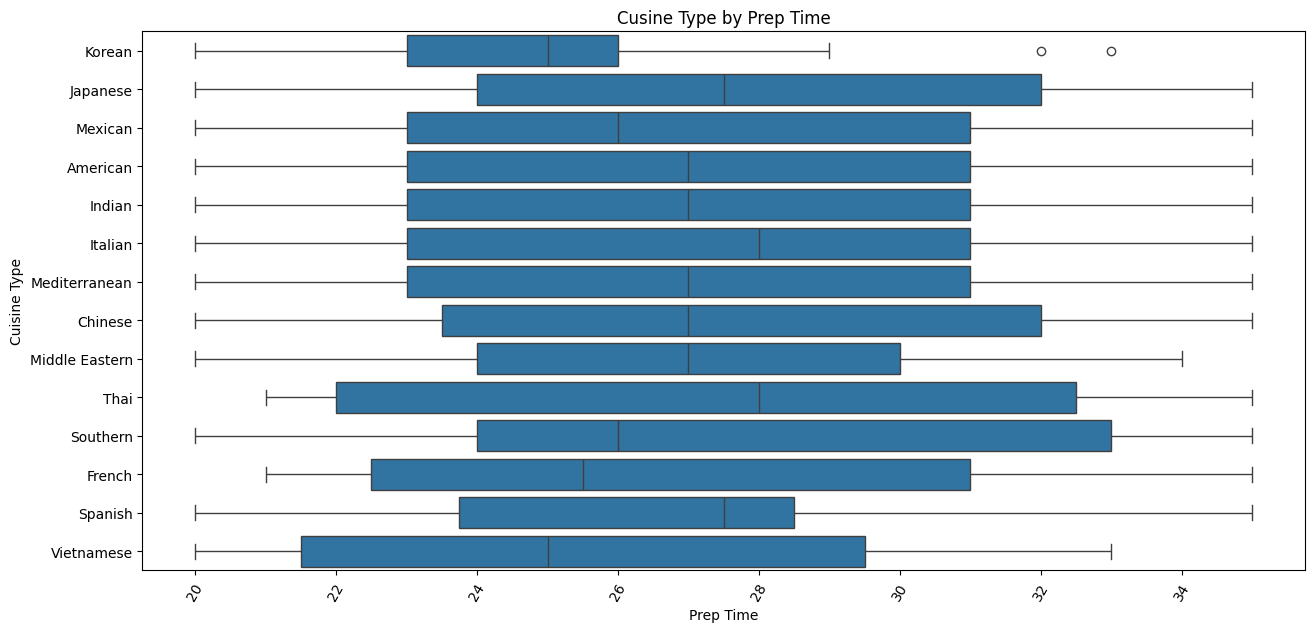

In [44]:
# Relationship between food preparation time and cuisine type shows that Korean and Vietnamese food is not only cheap but also prepared relatively quickly
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'food_preparation_time', y = 'cuisine_type')
plt.xlabel('Prep Time')
plt.xticks(rotation = 60)
plt.ylabel('Cuisine Type')
plt.title('Cusine Type by Prep Time')
plt.show()

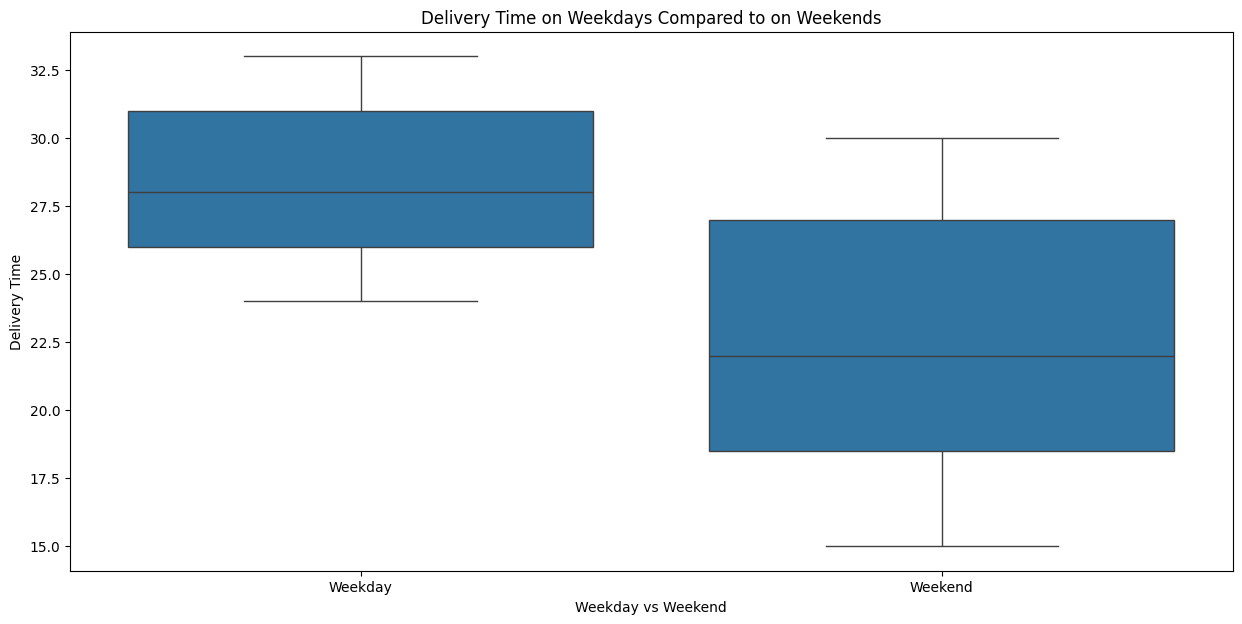

In [45]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = 'day_of_the_week', y = 'delivery_time', order=['Weekday','Weekend'])
plt.xlabel('Weekday vs Weekend')
plt.ylabel('Delivery Time')
plt.title('Delivery Time on Weekdays Compared to on Weekends')
plt.show()

In [46]:
# By grouping our dataframe by restaurant name and summing the cost of the order we can find out how much revenue each restaurant has generated from ordering on the app (before the app takes its cut)
# Shake Shack is pulling in the most money by far.
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


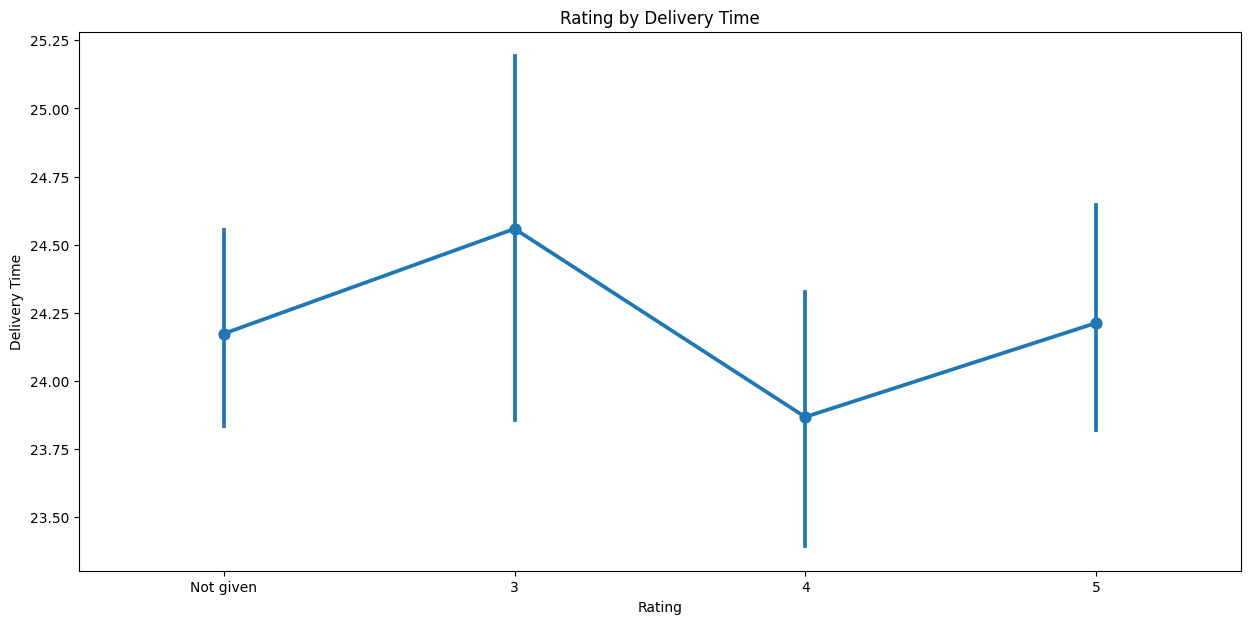

In [47]:
# Relationship between rating and delivery time.  Unsurprising that the 3* ratings tend to have higher delivery times.  People usually give ratings more when they have exceptionally good or bad service.
# That said the difference in average delivery times across ratings is not particularly large (within 2 minutes)
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'delivery_time', order = ['Not given','3','4','5'])
plt.xlabel('Rating')
plt.ylabel('Delivery Time')
plt.title('Rating by Delivery Time')
plt.show()

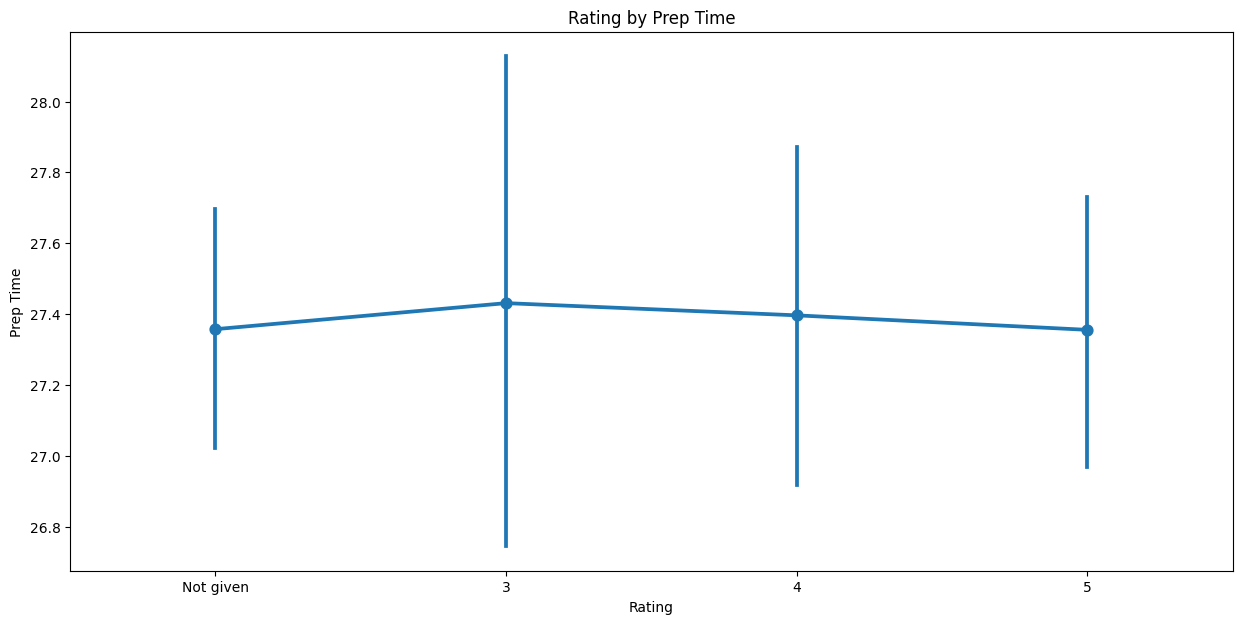

In [48]:
# Relationship between rating and food preparation time
# Delivery time seems to be more impactful than prep time.
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'food_preparation_time', order = ['Not given','3','4','5'])  # Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.xlabel('Rating')
plt.ylabel('Prep Time')
plt.title('Rating by Prep Time')
plt.show()

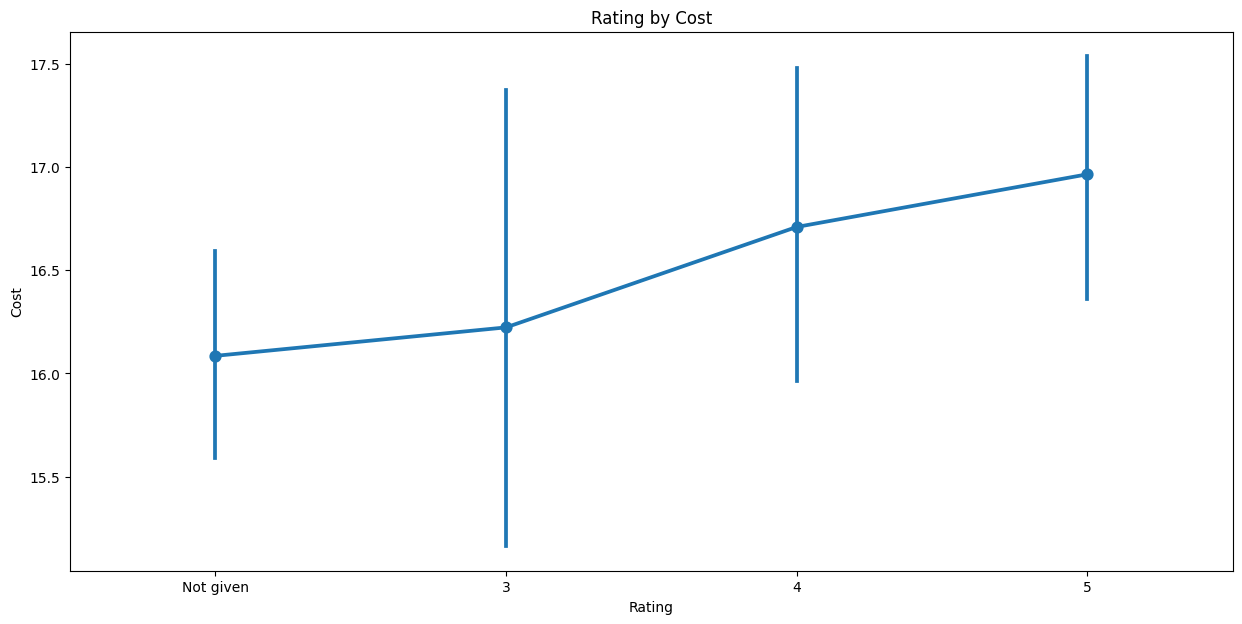

In [49]:
# Seems like you get what you pay more generally speaking.
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x = 'rating', y = 'cost_of_the_order', order = ['Not given','3','4','5'])
plt.xlabel('Rating')
plt.ylabel('Cost')
plt.title('Rating by Cost')
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [50]:
#Filter down to orders that have been rated
hasratingdf = df[df['rating'] != 'Not given'].reset_index(drop=True)
hasratingdf

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20
0,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,under
1,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over
2,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,under
3,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,over
4,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,under
...,...,...,...,...,...,...,...,...,...,...
1157,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30,under
1158,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22,under
1159,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,over
1160,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,under


In [51]:
#Find the restaurants that have more than 50 ratings.
ratedrestaurants = hasratingdf['restaurant_name'].value_counts()[hasratingdf['restaurant_name'].value_counts() > 50]
ratedrestaurants

,count
restaurant_name,
Shake Shack,133
The Meatball Shop,84
Blue Ribbon Sushi,73
Blue Ribbon Fried Chicken,64


In [52]:
#Filter down to the orders of the restaurants with 50 ratings
fiftyratingsdf = hasratingdf[hasratingdf['restaurant_name'].isin(ratedrestaurants.index)].reset_index(drop=True)
fiftyratingsdf

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20
0,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over
1,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,over
2,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,under
3,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,under
4,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,over
...,...,...,...,...,...,...,...,...,...,...
349,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,under
350,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,over
351,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,over
352,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,under


In [53]:
#Change the data type of the rating column to int so we can do math on it.
fiftyratingsdf['rating'] = pd.to_numeric(fiftyratingsdf['rating'])
fiftyratingsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               354 non-null    int64  
 1   customer_id            354 non-null    int64  
 2   restaurant_name        354 non-null    object 
 3   cuisine_type           354 non-null    object 
 4   cost_of_the_order      354 non-null    float64
 5   day_of_the_week        354 non-null    object 
 6   rating                 354 non-null    int64  
 7   food_preparation_time  354 non-null    int64  
 8   delivery_time          354 non-null    int64  
 9   $20                    354 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 27.8+ KB


In [54]:
#Group by restaurant_name and find the mean of the 'rating' column
fiftyratingsdf.groupby('restaurant_name')['rating'].mean()

,rating
restaurant_name,
Blue Ribbon Fried Chicken,4.328125
Blue Ribbon Sushi,4.219178
Shake Shack,4.278195
The Meatball Shop,4.511905


#### Observations: The following 4 restaurants all have more than 50 ratings and an average rating over 4.0 making them good candidates for the promotion.
######The Meatball Shop
######Blue Ribbon Fried Chicken
######Shake Shack
######Blue Ribbon Sushi

In [55]:
# Bonus observation, The Meatball Shop appears to be the only restaurant in the data set that has multiple different types of cuisine listed
groupeddf = df.groupby(['restaurant_name', 'cuisine_type']).count()
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.width', 1000):
    print(groupeddf.sort_values('restaurant_name'))

                                                      order_id  customer_id  cost_of_the_order  day_of_the_week  rating  food_preparation_time  delivery_time  $20
restaurant_name                       cuisine_type                                                                                                                
'wichcraft                            American               1            1                  1                1       1                      1              1    1
12 Chairs                             Middle Eastern         4            4                  4                4       4                      4              4    4
5 Napkin Burger                       American               5            5                  5                5       5                      5              5    5
67 Burger                             American               1            1                  1                1       1                      1              1    1
Alidoro               

In [56]:
groupeddf.loc[['The Meatball Shop']]

order_id  customer_id  cost_of_the_order  \
restaurant_name   cuisine_type                                             
The Meatball Shop American            20           20                 20   
                  Italian            112          112                112   

                                day_of_the_week  rating  \
restaurant_name   cuisine_type                            
The Meatball Shop American                   20      20   
                  Italian                   112     112   

                                food_preparation_time  delivery_time  $20  
restaurant_name   cuisine_type                                             
The Meatball Shop American                         20             20   20  
                  Italian                         112            112  112

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [57]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,over
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,under
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,under
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,under
...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,over
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,under
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,over
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,under


In [58]:
# create conditions and outputs lists for adding a new series to the dataframe based on the 'cost_of_the_order' field
# If 'cost_of_the_order' > $20 then revenue = 25% of 'cost_of_the_order'.  If 'cost_of_the_order' > 5  and <= 20 then revenue = 15% of 'cost_of_the_order'.  else 0
revenue_conditions = [df['cost_of_the_order'] > 20, df['cost_of_the_order'] > 5]
revenue_outputs = [round(df['cost_of_the_order'] *.25, 2), round(df['cost_of_the_order']*.15, 2)]

In [59]:
# add the field to the dataframe
df['revenue'] = pd.DataFrame(np.select(revenue_conditions, revenue_outputs, 0))
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20,revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,over,7.69
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,under,1.81
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,under,1.83
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over,7.30
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,under,1.74
...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,over,5.58
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,under,1.83
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,over,6.30
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,under,1.83


In [60]:
#Sum up the revenue column to find the total revenue.
revenue = round(df['revenue'].sum(), 2)
revenue

np.float64(6166.4)

In [61]:
# Curious what the revenue from just our top 4 highly rated restaurants is
ratedrevenuedf = df[df['restaurant_name'].isin(ratedrestaurants.index)].reset_index(drop=True)
ratedrevenue = round(ratedrevenuedf['revenue'].sum(), 2)
ratedrevenue

np.float64(1824.14)

#### Observations:
###### The total revenue of the sales in our data set would total $6,166.40

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [62]:
#Create a new column showing the total time it takes for food to reach the customer from the time they order it.
df['order_time'] = df['food_preparation_time'] + df['delivery_time']
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,$20,revenue,order_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,over,7.69,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,under,1.81,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,under,1.83,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,over,7.30,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,under,1.74,49
...,...,...,...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17,over,5.58,48
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19,under,1.83,50
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24,over,6.30,55
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31,under,1.83,54


In [63]:
# Find how many orders took over 60 minutes total
slow_orders = df[df['order_time'] > 60].shape[0]
slow_orders

200

In [64]:
# Find the total number of orders
total_orders = df.shape[0]
total_orders

1898

In [65]:
#Calculate the slow orders as a % of the total.
round(slow_orders/total_orders*100,2)

10.54

#### Observations:
######There were 200 orders that took over 60 minutes to be received by the customer.  
######That is 10.54% of the total number of orders.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [66]:
#Group by the day of the week and calculate the mean of delivery time
df.groupby('day_of_the_week')['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:
###### Average delivery times are 5.87 minutes lower during the weekend compared to weekdays
###### Average delivery time on weekdays is 28.34 minutes
###### Average delivery time on the weekend is 22.47 minutes
###### This could be due to any number of factors such as traffic at time of order (If weekday orders tend to be during rushhour for example) to number of available delivery drivers (More people deliverying food on the weekend as a 2nd job).

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business?

### Conclusions:
*  My main conclusions from my analysis are that there are a few restaurants that are driving the bulk of the orders on the platform.  (just the top 4 highly rated restaurants are accounting for almost 1/3rd of the revnue)
* I noticed that the majority of the customers placing orders on the app have only placed a single order.  (Very few customers place more than 4 orders)
* I'm also interested in the dataset itself.  During my analysis I found a few things that I noticed that made me wonder about how this data is collected.
  * The ratings present in the dataset only go from 3 to 5.  Is this the complete dataset?  Has it been scrubbed to remove negative reviews?  Does the app only allow you to rate something as low as 3?
  * Spliting the order date into just weekend and weekday is strange.  We could get more detailed analysis if actual day of the week were available.
  * On that note, timestamps for when the order was actually placed / picked up / delivered would be great to have.  The data definition says that the food prep fields are derived from the timestamps, it would be beneficial to provide those fields to us.
  *  The data set does not differentiate between different locations / restaurants with the same name.  For example I observed the following
      * Sarabeth's
      * Sarabeth's East
      * Sarabeth's Restaurant
      * Sarabeth's West
    
      These were all listed under different names and appear to represent different locations for the same restaurant.  By comparison Five Guys Burgers and Fries was only listed a single time and it is a well established franchise which could easily have multiple locations.  My concern is that due to the way the data has been collected we may be unfairly comparing single locations to multiple locations during some of our analysis.

### Recommendations:

* My main recommendation is to focus on converting more of the single order customers into repeate users.  I would offer an incentive to customers that have only made a single order in the past few months to make another order at a discount or comp their delivery fees.  Getting more orders placed on the platform is likely the biggest and most simple ways to increase revenue.
* I would also highlight the business that are generating the most revenue for the app.  Provide some way to feature them as reccomended restaurants and maybe offer a way for businesses to pay to have their restaurant featured as well as an additional revenue stream.
* I would also recommend making some changes to the data provided to us for analysis.
  * adding a unique identifier for each restaurant location would help ensure we're comparing apples to apples when performing analysis rather than comparing the metrics of individual locations to entire franchises.
  * Providing details about time of orders placed could help identify opportunities to provide incentives to customers in an effort to increase revenue during off-peak business hours.  Though even without them we can tell improvements could be made during the weekday.
  * Finally, I'm just questioning the validity of the data in general given that there were no ratings less than 3.  Maybe it's fine but just something to think about.

---